In [43]:
import bokeh.plotting as bpl
import cv2
import logging
try:
    cv2.setNumThreads(0)
except():
    pass

import sys
import json
from glob import glob
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ScanImageTiffReader import ScanImageTiffReader

import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params

from caiman_analysis import *
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour, view_patches_bar, view_patches
bpl.output_notebook()
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats
from vis import *
from scipy.io import savemat

import math
import sys
from os import path
import importlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import scipy.io as sio
sys.path.append('C://Users//Scanimage//Desktop//MoraNotebooks')
from chrome_test_py import *


Loading BokehJS ...

In [44]:
user_name = 'Mora'
#is your FOV cropped? if yes, please enter 
x_start = 100 # if not cropped this is 0
x_end = 450 # if not cropped this is 512
date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'ori'

tif_folder = 'D://'+ user_name + '//' + date +'//' + mouse + '//' + exp_name + '//'
suite2p_path = tif_folder + 'suite2p//' + 'plane0//'

stats = np.load(glob(suite2p_path + 'stat.npy')[0],allow_pickle=True)
iscell=np.load(glob(suite2p_path + 'iscell.npy')[0],allow_pickle=True)

In [45]:
suite2p_path

'D://Mora//20200802//MBOT5_419//ori//suite2p//plane0//'

In [46]:
#select the manually curated "good cells"
goodcells = stats[iscell[:,0]>0]

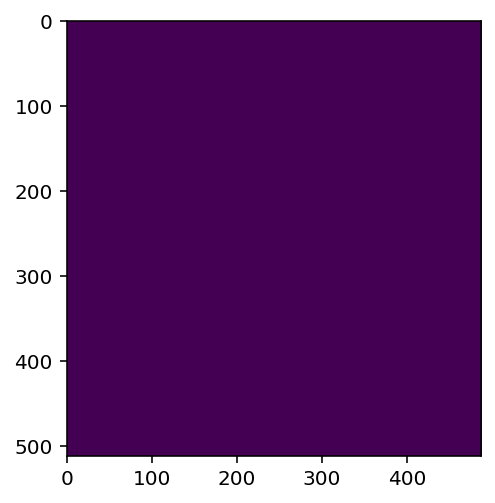

In [87]:
#select the cells with medians within the FOV for Caiman OnAn
cellsInFOV =[]
background = np.zeros((512,512,len(goodcells)))
im = np.zeros((512,512))
masks = []

for n in range(0,len(goodcells)):
    if ((goodcells[n]['med'][1]<x_end) & (goodcells[n]['med'][1]>x_start)):
        cellsInFOV.append(goodcells[n])
        ypix = goodcells[n]['ypix'][~goodcells[n]['overlap']]
        xpix = goodcells[n]['xpix'][~goodcells[n]['overlap']]
        background[ypix,xpix,n] = 1
        im[ypix,xpix] = n+1
        masks.append(background[:,:,n])

plt.imshow(background[1])
plt.show()        
 

In [88]:
# Choose expand method and morphological element of expansion. Dilation of masks provides more room for error

# Set the path of the individual masks. Adapt file extension if masks are not saved as .png

for i in range(len(masks)):
    # temporarily save the current mask as a boolean array
    temp = np.asarray(masks[i][:,x_start:x_end], dtype=bool)
    
    # the csc_matrix has to be initialized before adding the first mask
    if i == 0:
        suite2pSeed = np.zeros((np.prod(temp.shape), len(masks)), dtype=bool)

    # flatten the mask to a 1D array and add it to the csc_matrix
    suite2pSeed[:, i] = temp.flatten('F')

In [89]:
#save the seed to run Caiman analysis
np.save(suite2p_path+'seeding_template_caiman',suite2pSeed)

In [90]:
suite2pSeed.shape

(179200, 389)

In [91]:
179200/512

350.0

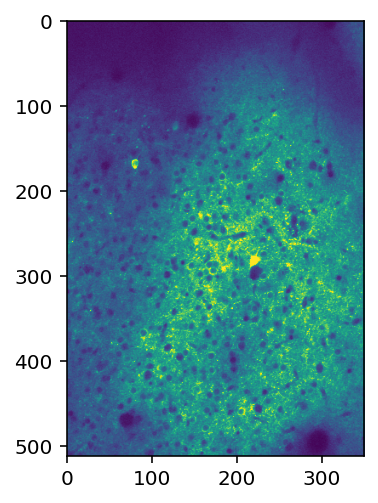

In [92]:
from glob import glob 
import imageio
import cv2

date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'ori'

ref_sess0 = 'D://'+ user_name + '//' + date +'//' + mouse + '//' + 'reference' + '//'
#suite2p_path1 = tif_folder1 + 'suite2p//' + 'plane0//'

image_path = glob(ref_sess0 + '*.png')[0]


img= imageio.imread(image_path)
img= img[:,x_start:x_end,1]
plt.imshow(img)

In [95]:
im = im[:,x_start:x_end]

The output of this function is a binary matrix with dimensions # of pixels x # of components that can then be used to seed the CNMF algorithm. Each column of the matrix represents the mask of an individual component.

In [96]:
crd = nb_plot_contour(im,  suite2pSeed.astype('float32'), img.shape[0], img.shape[1], thr=0.3)
plt.savefig(suite2p_path + 'seeding_template_caiman.png')
plt.show()

<Figure size 432x288 with 0 Axes>